In [191]:
#Import Necessary Libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from nltk.tokenize import RegexpTokenizer
from nltk import FreqDist
from matplotlib.ticker import MaxNLocator

Received an error message so I looked up the error and found that I needed to [change the encodings](https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas)

In [192]:
#Import Data
df = pd.read_csv('https://raw.githubusercontent.com/josh-g-grimes/Twitter-Sentiment-NLP/main/data.csv', encoding='latin-1')

In [193]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [194]:
df = df.rename(columns={"is_there_an_emotion_directed_at_a_brand_or_product": "tweet_sentiment"})

In [195]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,tweet_sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


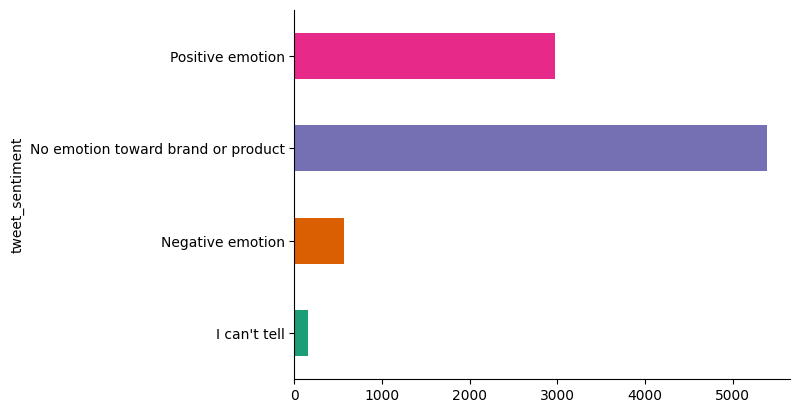

In [196]:
#Look at the distribution of emotions that are directed at brands or products
df.groupby('tweet_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [197]:
df.drop(columns=['emotion_in_tweet_is_directed_at'], inplace=True)

In [198]:
df['tweet_sentiment'] = df['tweet_sentiment'].map({'Positive emotion': 0, 'Negative emotion': 1})

In [199]:
df = df.dropna()

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3548 entries, 0 to 9088
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_text       3548 non-null   object 
 1   tweet_sentiment  3548 non-null   float64
dtypes: float64(1), object(1)
memory usage: 83.2+ KB


In [201]:
df.head()

,tweet_text,tweet_sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,1.0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,0.0
2,@swonderlin Can not wait for #iPad 2 also. The...,0.0
3,@sxsw I hope this year's festival isn't as cra...,1.0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,0.0


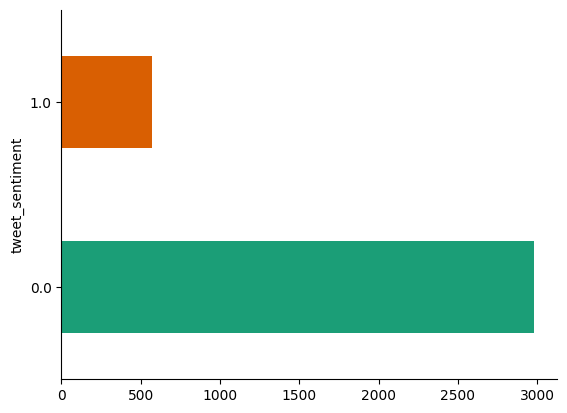

In [202]:
df.groupby('tweet_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [203]:
X = df['tweet_text']
y = df['tweet_sentiment']

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [205]:
X_train = pd.concat([X_train, y_train.rename('Label')], axis=1)

In [206]:
X_train.head()

,tweet_text,Label
2802,What a great blog on the latest news of #SXSW ...,0.0
440,Lovin the digital! @mention band sings into iP...,0.0
1314,At #sxsw? We're giving away an iPad 2 to the c...,0.0
6226,RT @mention Just won an iPad 2 at #sxsw thanks...,0.0
5273,RT @mention #sxsw #geogames #android if you de...,0.0


In [207]:
X_train['tweet_text'] = X_train['tweet_text'].str.lower()

In [208]:
X_train.head()

,tweet_text,Label
2802,what a great blog on the latest news of #sxsw ...,0.0
440,lovin the digital! @mention band sings into ip...,0.0
1314,at #sxsw? we're giving away an ipad 2 to the c...,0.0
6226,rt @mention just won an ipad 2 at #sxsw thanks...,0.0
5273,rt @mention #sxsw #geogames #android if you de...,0.0


In [209]:
token_pattern = r"(?u)\b\w\w+\b"

tokenizer = RegexpTokenizer(token_pattern)



In [210]:
X_train["tweet_text_tokenized"] = X_train['tweet_text'].apply(tokenizer.tokenize)

In [211]:
X_train.head()

,tweet_text,Label,tweet_text_tokenized
2802,what a great blog on the latest news of #sxsw ...,0.0,"[what, great, blog, on, the, latest, news, of,..."
440,lovin the digital! @mention band sings into ip...,0.0,"[lovin, the, digital, mention, band, sings, in..."
1314,at #sxsw? we're giving away an ipad 2 to the c...,0.0,"[at, sxsw, we, re, giving, away, an, ipad, to,..."
6226,rt @mention just won an ipad 2 at #sxsw thanks...,0.0,"[rt, mention, just, won, an, ipad, at, sxsw, t..."
5273,rt @mention #sxsw #geogames #android if you de...,0.0,"[rt, mention, sxsw, geogames, android, if, you..."


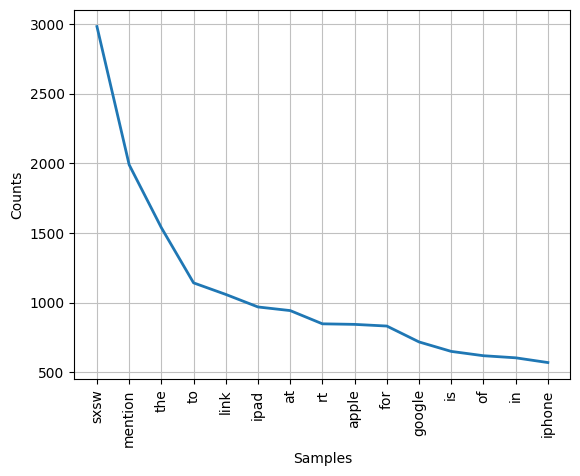

<Axes: xlabel='Samples', ylabel='Counts'>

In [232]:
train_freq_dist = FreqDist(X_train['tweet_text_tokenized'].sum())
train_freq_dist.plot(15, cumulative=False)

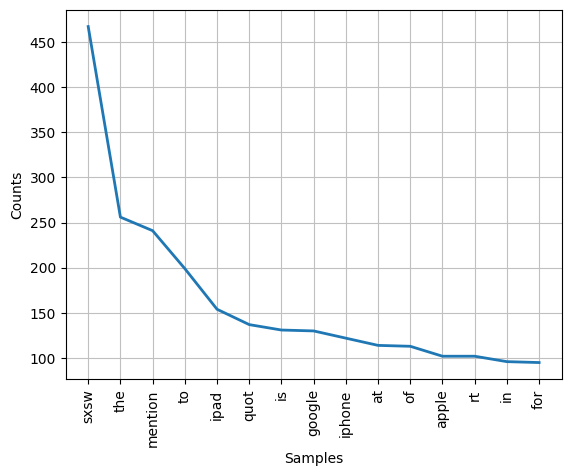

<Axes: xlabel='Samples', ylabel='Counts'>

In [233]:
train_freq_dist_negative = FreqDist(X_train[X_train['Label'] == 1]['tweet_text_tokenized'].sum())
train_freq_dist_negative.plot(15, cumulative=False)

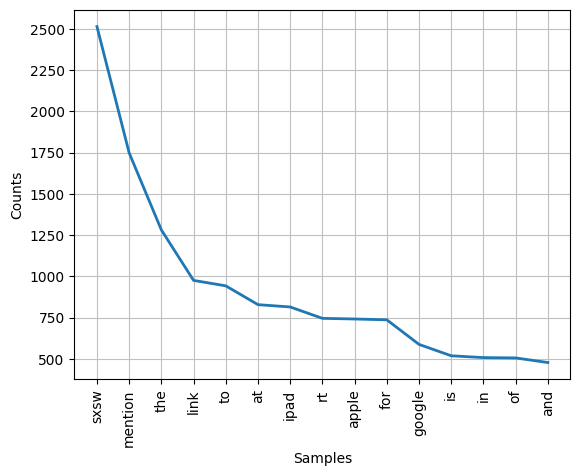

<Axes: xlabel='Samples', ylabel='Counts'>

In [234]:
train_freq_dist_positive = FreqDist(X_train[X_train['Label'] == 0]['tweet_text_tokenized'].sum())
train_freq_dist_positive.plot(15, cumulative=False)